**KLASIFIKASI GAMBAR**

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fungsi untuk memuat gambar dan mengekstrak fitur HOG
def extract_features_from_image(image_path):
    try:
        image = cv2.imread(image_path)  # Membaca gambar
        if image is None:
            print(f"Gambar tidak dapat dibaca: {image_path}")
            return None
        image = cv2.resize(image, (128, 64))  # Mengubah ukuran gambar jika perlu
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi ke grayscale
        fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        return fd  # Fitur HOG
    except Exception as e:
        print(f"Error dalam memproses gambar {image_path}: {e}")
        return None

# Menentukan folder dataset
folder_path = 'nonanemic'
image_paths = []  # Menyimpan path gambar
labels = []  # Menyimpan label kelas gambar

# Membaca gambar dari folder tanpa subfolder
for image_name in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image_name)
    if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Menyaring format gambar
        image_paths.append(image_path)
        labels.append('nonanemic')  # Semua gambar diberi label 'nonanemic'

# Debugging: Melihat jumlah gambar dan labels yang dimuat
print(f"Jumlah gambar yang ditemukan: {len(image_paths)}")
print(f"Jumlah label yang ditemukan: {len(labels)}")

# Menyiapkan fitur dan label
features = []
for image_path in image_paths:
    feature = extract_features_from_image(image_path)
    if feature is not None:
        features.append(feature)

# Debugging: Melihat jumlah fitur yang berhasil diekstraksi
print(f"Jumlah fitur yang berhasil diekstraksi: {len(features)}")

# Jika tidak ada fitur yang berhasil diekstraksi, hentikan eksekusi
if len(features) == 0:
    print("Tidak ada fitur yang berhasil diekstraksi. Pastikan gambar dapat dibaca dengan benar.")
    exit()

# Melakukan standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Melakukan PCA untuk pengurangan dimensi (opsional)
pca = PCA(n_components=50)  # Mengurangi menjadi 50 fitur utama
X_pca = pca.fit_transform(X_scaled)

# Membuat model One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')  # nu=0.1 untuk membatasi jumlah outlier

# Melatih model One-Class SVM
ocsvm.fit(X_pca)

# Melakukan prediksi pada data uji
y_pred = ocsvm.predict(X_pca)

# One-Class SVM mengembalikan 1 untuk data yang sesuai dengan kelas dan -1 untuk outlier
# Menghitung akurasi (mengingat kita hanya punya satu kelas)
y_pred_binary = (y_pred == 1).astype(int)

# Karena kita hanya memiliki satu kelas, kita bisa melaporkan akurasi untuk prediksi non-anomali (semua gambar adalah 'nonanemic')
print("Akurasi Model: ", accuracy_score(np.ones_like(y_pred_binary), y_pred_binary))
print("\nLaporan Klasifikasi:\n", classification_report(np.ones_like(y_pred_binary), y_pred_binary))

In [3]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fungsi untuk memuat gambar dan mengekstrak fitur HOG
def extract_features_from_image(image_path):
    try:
        image = cv2.imread(image_path)  # Membaca gambar
        if image is None:
            print(f"Gambar tidak dapat dibaca: {image_path}")
            return None
        image = cv2.resize(image, (128, 64))  # Mengubah ukuran gambar jika perlu
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi ke grayscale
        fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        return fd  # Fitur HOG
    except Exception as e:
        print(f"Error dalam memproses gambar {image_path}: {e}")
        return None

# Menentukan folder dataset
folder_path_anemic = 'anemic'
folder_path_non_anemic = 'nonanemic'

image_paths = []  # Menyimpan path gambar
labels = []  # Menyimpan label kelas gambar

# Membaca gambar dari folder anemic
for image_name in os.listdir(folder_path_anemic):
    image_path = os.path.join(folder_path_anemic, image_name)
    if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Menyaring format gambar
        image_paths.append(image_path)
        labels.append('anemic')  # Label untuk gambar anemic

# Membaca gambar dari folder nonanemic
for image_name in os.listdir(folder_path_non_anemic):
    image_path = os.path.join(folder_path_non_anemic, image_name)
    if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Menyaring format gambar
        image_paths.append(image_path)
        labels.append('nonanemic')  # Label untuk gambar nonanemic

# Debugging: Melihat jumlah gambar dan labels yang dimuat
print(f"Jumlah gambar yang ditemukan: {len(image_paths)}")
print(f"Jumlah label yang ditemukan: {len(labels)}")

# Menyiapkan fitur dan label
features = []
for image_path in image_paths:
    feature = extract_features_from_image(image_path)
    if feature is not None:
        features.append(feature)

# Debugging: Melihat jumlah fitur yang berhasil diekstraksi
print(f"Jumlah fitur yang berhasil diekstraksi: {len(features)}")

# Jika tidak ada fitur yang berhasil diekstraksi, hentikan eksekusi
if len(features) == 0:
    print("Tidak ada fitur yang berhasil diekstraksi. Pastikan gambar dapat dibaca dengan benar.")
    exit()

# Mengonversi label ke dalam bentuk numerik
label_map = {'anemic': 0, 'nonanemic': 1}  # Label 'anemic' menjadi 0, 'nonanemic' menjadi 1
labels_numeric = np.array([label_map[label] for label in labels])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels_numeric, test_size=0.2, random_state=42)

# Melakukan standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melakukan PCA untuk pengurangan dimensi (opsional)
pca = PCA(n_components=50)  # Mengurangi menjadi 50 fitur utama
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Membuat model SVM
svm = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm.fit(X_train_pca, y_train)

# Melakukan prediksi pada data uji
y_pred = svm.predict(X_test_pca)

# Evaluasi model
print("Akurasi Model: ", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Jumlah gambar yang ditemukan: 4277
Jumlah label yang ditemukan: 4277
Jumlah fitur yang berhasil diekstraksi: 4277
Akurasi Model:  0.6133177570093458

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73       535
           1       0.47      0.24      0.32       321

    accuracy                           0.61       856
   macro avg       0.56      0.54      0.52       856
weighted avg       0.58      0.61      0.58       856



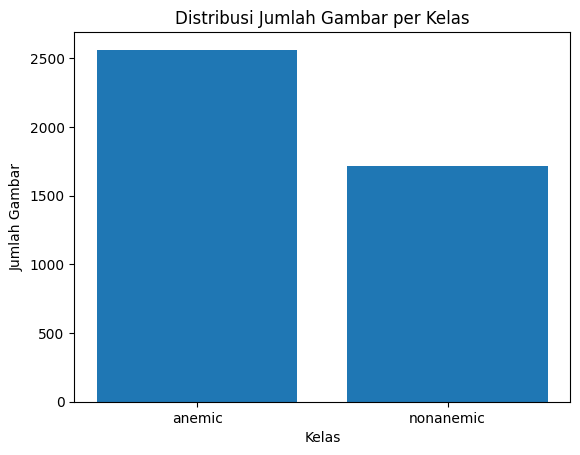

Jumlah gambar yang ditemukan: 4277
Jumlah label yang ditemukan: 4277
Jumlah fitur yang berhasil diekstraksi: 4277
Akurasi Model:  0.883177570093458

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       535
           1       0.83      0.86      0.85       321

    accuracy                           0.88       856
   macro avg       0.87      0.88      0.88       856
weighted avg       0.88      0.88      0.88       856



In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fungsi untuk memuat gambar dan mengekstrak fitur HOG
def extract_features_from_image(image_path):
    try:
        image = cv2.imread(image_path)  # Membaca gambar
        if image is None:
            print(f"Gambar tidak dapat dibaca: {image_path}")
            return None
        image = cv2.resize(image, (64, 64))  # Resize gambar menjadi 64x64
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi ke grayscale
        fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        return fd  # Fitur HOG
    except Exception as e:
        print(f"Error dalam memproses gambar {image_path}: {e}")
        return None

# Menentukan folder dataset
folder_path_anemic = 'anemic'
folder_path_non_anemic = 'nonanemic'

image_paths = []  # Menyimpan path gambar
labels = []  # Menyimpan label kelas gambar

# Membaca gambar dari folder anemic
for image_name in os.listdir(folder_path_anemic):
    image_path = os.path.join(folder_path_anemic, image_name)
    if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Menyaring format gambar
        image_paths.append(image_path)
        labels.append('anemic')  # Label untuk gambar anemic

# Membaca gambar dari folder nonanemic
for image_name in os.listdir(folder_path_non_anemic):
    image_path = os.path.join(folder_path_non_anemic, image_name)
    if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Menyaring format gambar
        image_paths.append(image_path)
        labels.append('nonanemic')  # Label untuk gambar nonanemic

# Visualisasi jumlah gambar per kelas (EDA)
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts)
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()

# Debugging: Melihat jumlah gambar dan labels yang dimuat
print(f"Jumlah gambar yang ditemukan: {len(image_paths)}")
print(f"Jumlah label yang ditemukan: {len(labels)}")

# Menyiapkan fitur dan label
features = []
valid_labels = []  # Menyimpan label yang valid sesuai fitur
for image_path, label in zip(image_paths, labels):
    feature = extract_features_from_image(image_path)
    if feature is not None:  # Pastikan fitur berhasil diekstraksi
        features.append(feature)
        valid_labels.append(label)

# Debugging: Melihat jumlah fitur yang berhasil diekstraksi
print(f"Jumlah fitur yang berhasil diekstraksi: {len(features)}")

# Jika tidak ada fitur yang berhasil diekstraksi, hentikan eksekusi
if len(features) == 0:
    print("Tidak ada fitur yang berhasil diekstraksi. Pastikan gambar dapat dibaca dengan benar.")
    exit()

# Mengonversi label ke dalam bentuk numerik
label_map = {'anemic': 0, 'nonanemic': 1}  # Label 'anemic' menjadi 0, 'nonanemic' menjadi 1
labels_numeric = np.array([label_map[label] for label in valid_labels])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels_numeric, test_size=0.2, random_state=42)

# Melakukan standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVM
svm = SVC(kernel='linear', random_state=42, class_weight='balanced')

# Melatih model SVM
svm.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = svm.predict(X_test_scaled)

# Evaluasi model
print("Akurasi Model: ", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
